# Statistiche e grafici delle risoluzioni<br>Cubo di Rubik 2x2x2

<img src="../immagini/cubo_2x2x2.jpg" width="400" height="400">

In [7]:
from pandas import read_csv
import matplotlib.pyplot as plt
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
df = df[df["Cubo"] == "2x2x2"]
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))
df = modulo_rubik.aggiunta_colonne_data(df)

## Ultime 10 risoluzioni

In [8]:
# Ultime 10 risoluzioni
df.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
152,2025-08-24,2025,Ago,24,68.52,"(1, 8.52)",2x2x2
155,2025-08-30,2025,Ago,30,23.07,"(0, 23.07)",2x2x2
188,2025-11-14,2025,Nov,14,59.16,"(0, 59.16)",2x2x2
189,2025-11-14,2025,Nov,14,58.66,"(0, 58.66)",2x2x2
190,2025-11-14,2025,Nov,14,41.00,"(0, 41.0)",2x2x2
191,2025-11-14,2025,Nov,14,47.43,"(0, 47.43)",2x2x2
192,2025-11-14,2025,Nov,14,39.08,"(0, 39.08)",2x2x2
201,2026-01-10,2026,Gen,10,48.48,"(0, 48.48)",2x2x2
202,2026-01-10,2026,Gen,10,101.49,"(1, 41.49)",2x2x2
203,2026-01-10,2026,Gen,10,21.43,"(0, 21.43)",2x2x2


## Record attuale🥇

In [9]:
# Record
minuti, secondi = modulo_rubik.conversione_secondi((modulo_rubik.ricerca_record("2x2x2")))
print(f"Il record attuale è di {minuti} minuti e {secondi} secondi")

Il record attuale è di 0 minuti e 15.12 secondi


## Classifica 10 migliori risoluzioni 🥇🥈🥉...

In [10]:
# Classifica 10 migliori risoluzioni
df.sort_values(by="Secondi", ascending=True).head(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo
84,2025-03-21,2025,Mar,21,15.12,"(0, 15.12)",2x2x2
81,2025-03-09,2025,Mar,9,15.66,"(0, 15.66)",2x2x2
203,2026-01-10,2026,Gen,10,21.43,"(0, 21.43)",2x2x2
155,2025-08-30,2025,Ago,30,23.07,"(0, 23.07)",2x2x2
83,2025-03-21,2025,Mar,21,24.74,"(0, 24.74)",2x2x2
68,2025-02-22,2025,Feb,22,26.90,"(0, 26.9)",2x2x2
30,2025-01-26,2025,Gen,26,28.12,"(0, 28.12)",2x2x2
71,2025-02-23,2025,Feb,23,28.13,"(0, 28.13)",2x2x2
150,2025-08-24,2025,Ago,24,31.11,"(0, 31.11)",2x2x2
142,2025-08-16,2025,Ago,16,31.45,"(0, 31.45)",2x2x2


## Tempo medio mensile delle risoluzioni

In [11]:
# Tempo medio mensile risoluzioni
df.groupby(by=["Mese"], sort=False)["Secondi"].mean().round(2)

Mese
Gen    87.30
Feb    51.17
Mar    40.98
Mag    57.89
Ago    40.94
Nov    49.07
Name: Secondi, dtype: float64

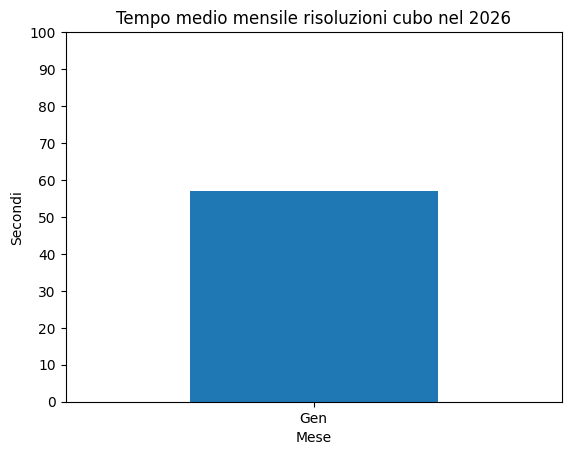

In [12]:
# Grafico tempo medio mensile risoluzioni
modulo_rubik.grafico_medie_mensili(df_cubo=df, anno=2026)

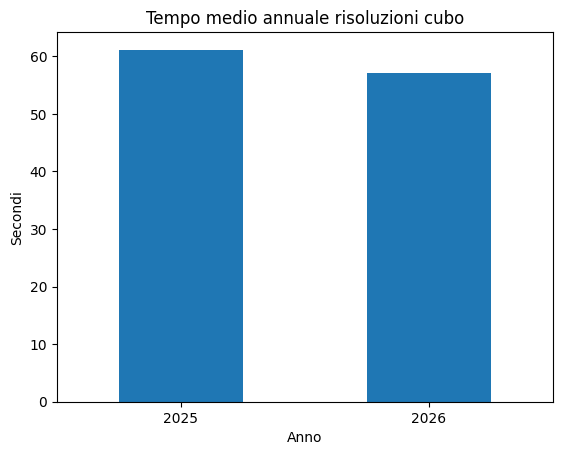

In [13]:
modulo_rubik.grafico_medie_annuali(df_cubo=df)

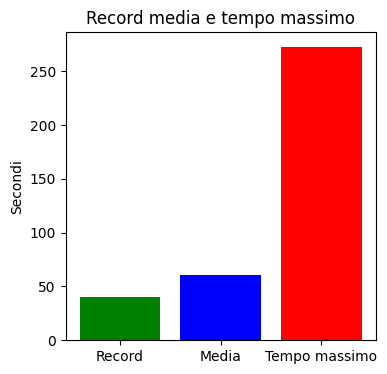

In [14]:
modulo_rubik.grafico_record_media_massimo(df)

In [15]:
# Numero di risoluzioni del 2026 in base al mese
df[df["Anno"]==2026]["Mese"].value_counts()

Mese
Gen    3
Name: count, dtype: int64

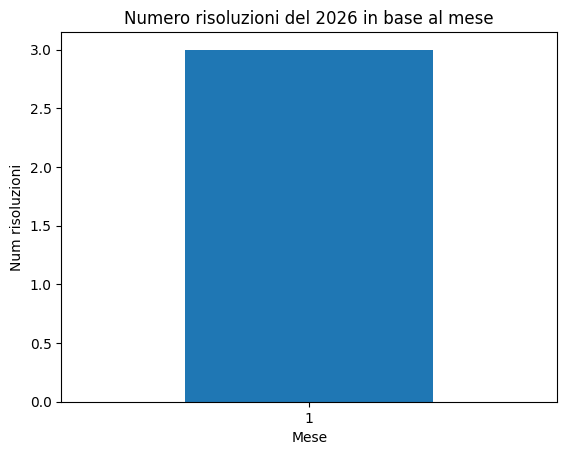

In [16]:
# Grafico del numero di risoluzioni del 2026 in base al mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2026)